LMS Exploration
<br/>**4. 나의 첫 번째 캐글 경진대회, 무작정 따라해보기**

서론
<br/>개발 환경
<br/>EDA
* 데이터 정보
* 데이터 전처리
* 데이터 시각화

<br/>Keras Neural Network
* train, test 데이터 분리
* 데이터 전처리
* 모델 구성
* 모델 학습

결론
<br/>참고문헌

##서론

Keras 신경망 알고리즘의 코드의 출처는
<br/>대회 2019 2nd ML month with KaKR에 제출했던 참가자의 코드
<br/>[왕초보의 keras neural network 를 이용한 회귀 (0320)](https://www.kaggle.com/code/janged/keras-neural-network-0320/notebook) 이다.
<br/> 코드를 해석하는 리뷰 형식의 글을 작성한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

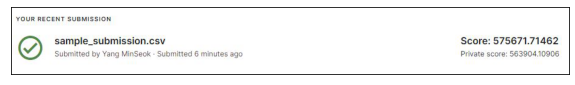

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
a = imread('/content/drive/MyDrive/lms/kingcountyhouse/kaggle.JPG')
plt.figure(figsize = (10,25))
plt.imshow(a)
plt.xticks([]) 
plt.yticks([])
plt.show()

[캐글 점수 결과](https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/submissions?group=successful&page=1&pageSize=100)
<br/>Score: 575671.71462
<br/>Private score: 563904.10906


왕초보의 시선에서 이 코드의 점수가 왜 낮은지 알아보는 시간을 가지겠다.

높은 점수의 코드를 공부하는 시간도 중요하지만
<br/>낮은 점수의 코드를 공부하는 시간도 중요하다고 생각한다.

낮은 점수의 코드에서 부족한 점을 분석하면 어떻게 더 나아질 수 있을까
<br/>개선 방향을 생각해볼 수 있기 때문이다.

더구나 코딩을 시작한지 얼마 되지 않은 왕초보의 시선에서
<br/>이렇게 코드 자체의 문제점을 분석하는 경험은 
<br/>수학문제의 오답노트를 작성하는 것 같은 효과를 줄 것으로 생각한다.

#개발 환경

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import join
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings는 실행시에 경고메시지를 지우는 역할을 한다.

os.path는 경로명(파일명)에 대한 유용한 함수를 제공한다.

pandas는 행과 열로 이루어진 데이터 객체를 만들어 안정적으로 대용량의 데이터들을 처리한다.

numpy는 array 단위로 벡터와 행렬을 계산한다.

seaborn과 matplotlib은 시각화를 한다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

sklearn.preprocessing의 MinMaxScaler, StandardScaler는
<br/>서로 다른 변수의 값에 대한 범위를 일정한 수준으로 맞추는 작업으로
<br/>이를 피처 스케일링(feature scaling)이라고 한다.

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from keras import backend as K
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

Keras에서 AttributeError: module 'keras.optimizers' has no attribute 'RMSprop' 에러가 발생할 수 있으므로
<br/>from keras import optimizers 대신에
<br/>from tensorflow.keras import optimizers를 불러와야 한다.

Keras는 model-level의 라이브러리이기 때문에 low-level과 관련된 연산을 다루지 못한다.
<br/>그 대신 backend로서 TensorFlow, Theano, CNTK를 사용할 수 있다.

Keras는 Tensorflow 위에서 동작하는 라이브러리이다.
<br/>사용자 친화적으로 개발된 Keras의 쉽다는 장점과
<br/>딥러닝 프로젝트에서 범용적으로 활용할 수 있는
<br/>Tensorflow의 장점을 통합할 수 있는 환경을 설정한다.

Callbacks 함수 EarlyaStopping은 검증 세트에서의 손실이 더 이상 감소하지 않으면 학습을 중단한다.
<br/>ModelCheckpoint은 모델을 학습시키는 동안 에포크마다 자동으로 저장한다.
<br/>ReduceLROnPlateau은 검증 손실이 향상되지 않을 때 학습률을 조절한다.
<br/>TensorBoard는 지표 요약 도표, 훈련 그래프 시각화, 활성화 히스토그램, 샘플링 된 프로파일링을 제공한다.

In [ ]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [ ]:
library_name = ['pandas=', 'numpy=', 'matplotlib=', 'seaborn=', 'sklearn=', 'keras=', 'tensorflow=']
library_version = []
f = open('/content/drive/MyDrive/lms/library_version.txt', 'r')
line = f.readline()
while True:
    line = f.readline()
    if not line:
      break
    for i in library_name:
      if i in line:
        library_version.append(line)

f.close()

import sys
print(sys.version)
print()
print(str(library_version).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='')

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

keras==2.8.0 matplotlib==3.2.2 numpy==1.21.6 pandas==1.3.5 seaborn==0.11.2 sklearn==0.0 sklearn-pandas==1.8.0 tensorflow==2.8.2+zzzcolab20220527125636

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다.

#EDA

##데이터 정보

[House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

미국 워싱턴주의 King County(시애틀 포함)에 위치한 집 가격 정보를 갖고 있다.
<br/>2014년 5월부터 2015년 5월까지 팔렸던 집에 대한 정보를 포함하고 있다.
<br/>단순한 회귀 모델을 평가하기에 좋은 데이터셋이다.

In [ ]:
data_dir = '/content/drive/MyDrive/LMS/KingCountyHouse'
os.chdir(data_dir)

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      

print(train_data_path)
print(sub_data_path)

/content/drive/MyDrive/LMS/KingCountyHouse/train.csv
/content/drive/MyDrive/LMS/KingCountyHouse/test.csv


os.chdir은 현재 실행하는 스크립트의 경로를 변경한다.

In [ ]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


학습 데이터는 15035개, 테스트 데이터는 6468개로 이루어져 있다.
<br/>데이터셋 중에서 70%를 학습, 30%를 테스트 데이터로 비중을 둔다.


In [ ]:
y = data['price']
del data['price']

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


학습 데이터에서 라벨을 제거한다.
<br/>price 컬럼은 따로 y라는 변수에 저장한 후 해당 컬럼을 학습 데이터에서 지운다.

In [ ]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21503


학습 데이터와 테스트 데이터를 합쳐
<br/>모델을 학습시키기 전에, 전체 데이터에 대해 탐색해본다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21503 non-null  int64  
 1   date           21503 non-null  object 
 2   bedrooms       21503 non-null  int64  
 3   bathrooms      21503 non-null  float64
 4   sqft_living    21503 non-null  int64  
 5   sqft_lot       21503 non-null  int64  
 6   floors         21503 non-null  float64
 7   waterfront     21503 non-null  int64  
 8   view           21503 non-null  int64  
 9   condition      21503 non-null  int64  
 10  grade          21503 non-null  int64  
 11  sqft_above     21503 non-null  int64  
 12  sqft_basement  21503 non-null  int64  
 13  yr_built       21503 non-null  int64  
 14  yr_renovated   21503 non-null  int64  
 15  zipcode        21503 non-null  int64  
 16  lat            21503 non-null  float64
 17  long           21503 non-null  float64
 18  sqft_li

<br/>date 컬럼은 object 자료형이다. 나머지 컬럼은 정수형이거나 실수형이다.
<br/>

In [ ]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


각 개체에 21개의 정보(id, date, price 등)가 담겨져 있다.

##데이터 전처리

In [ ]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


Python 문자열 format() 메서드와 pd.isnull를 활용하여 결측치인 데이터를 제거한다.

In [ ]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


전체 데이터에서 id 컬럼을 추출하여 sub_id를 할당하고
<br/>전체 데이터에서 id 컬럼을 제거한다.

In [ ]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


apply 함수로 리스트의 0부터 5자리까지 잘라서 date에서 연/월 데이터만 사용한다.

##데이터 시각화

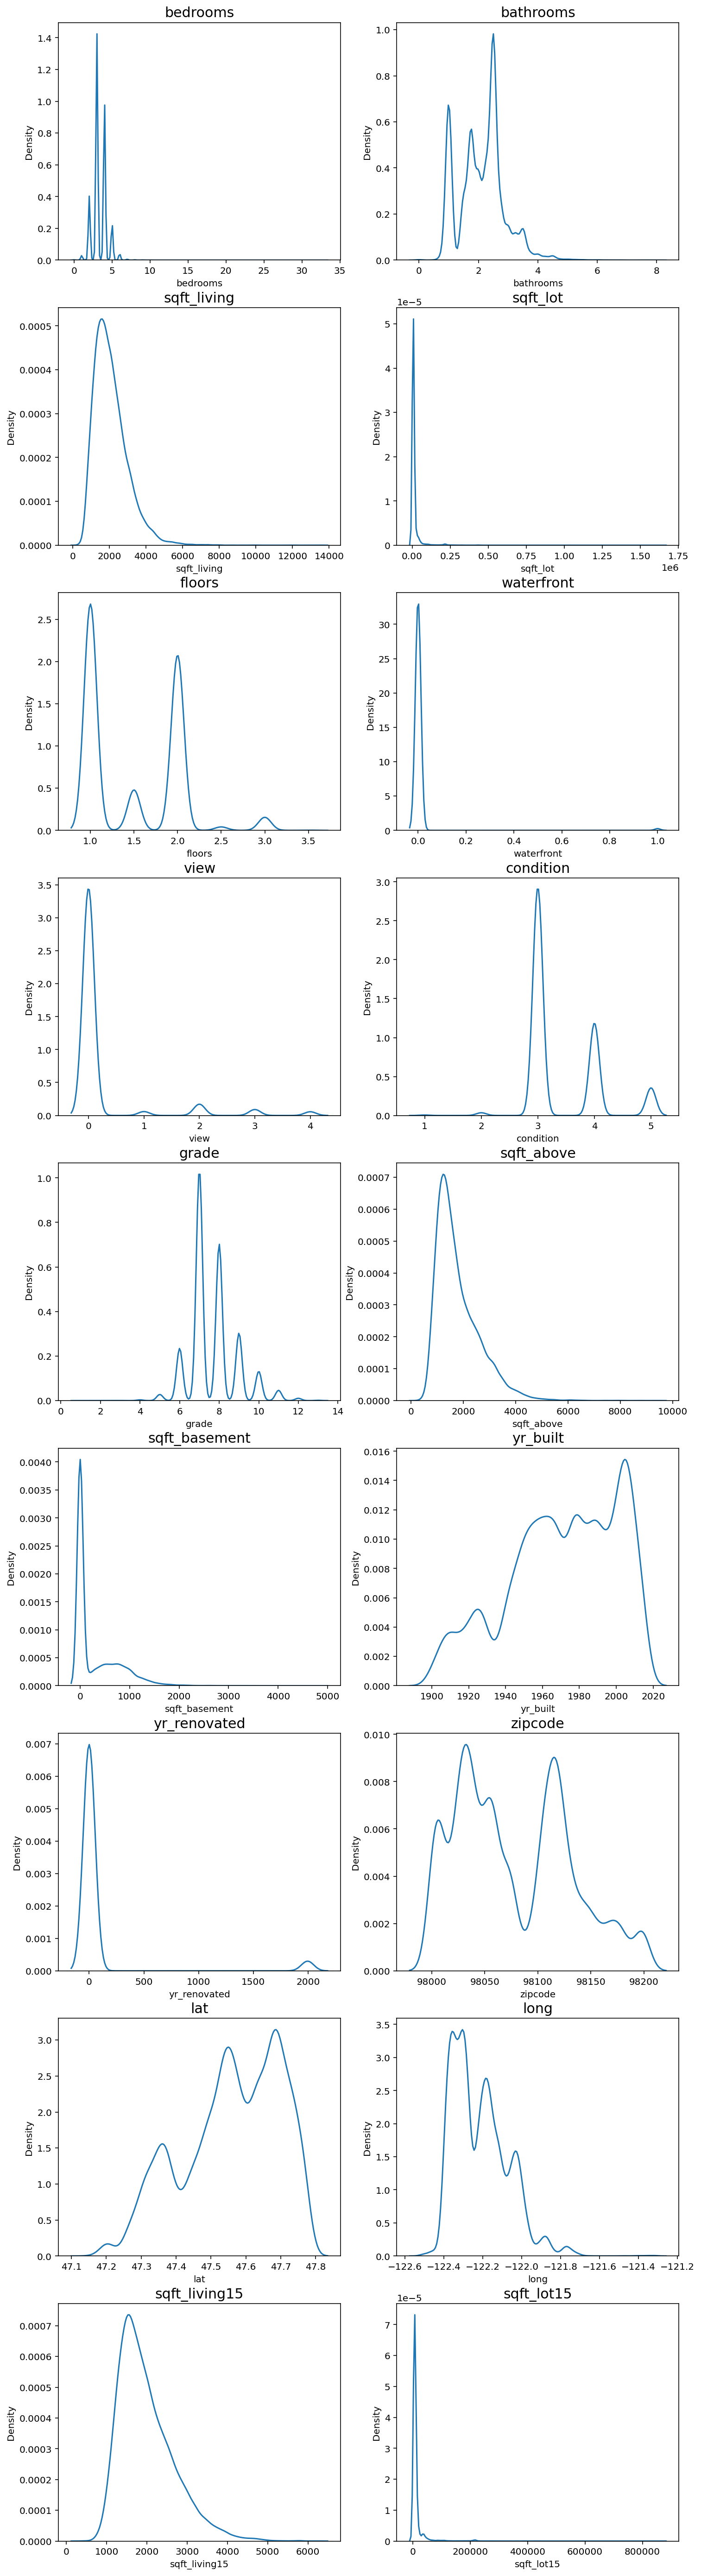

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))  
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

2중 for문을 사용해 10행 2열의 그래프를 그린다.
<br/>sns.kdeplot은 histogram과 비교하면 이해가 쉽다.
<br/>histogram은 관측치를 막대그래프(bin)를 이산형(discrete)로 나타내는 반면
<br/>KDE는 카우스 커널을 사용해서 그래프를 연속적으로 부드럽게 나타냅니다.

bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 변수가
<br/>한쪽으로 치우친 경향을 보이는군요.
<br/>그 이유는 불균형 때문이다.
<br/>소수의 집 소유자는 많은 침실(bedrooms)과 넓은 면적(sqft_..)를 가지고 있지만
<br/>다수의 집 소유자는 5개 이하의 침실과 비교적 좁은 면적을 가지고 있기 때문이다.


In [ ]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)


로그 변환(log-scaling)을 통해 한 쪽으로 치우친 데이터 분포를 정규분포에 가깝게 만든다.
<br/>np.log1p 함수를 활용해 로그 변환(log-scaling)을 한다.
<br/>

In [ ]:
data_skew = []
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for i in skew_columns:
  s1 = data[i].skew()
  data_skew.append(s1)

print(data_skew)

[-1.2339330133113007, -0.18133315458284446, 0.4055819043927116, 0.1293284333403592, 0.44862070508891505, 0.43452221372073635, 0.10430361028465732]


skew 함수를 이용해 정규분포인지 검정한다.
<br/>왜도는 분포의 비대칭성을 나타내는 척도이다.
<br/>Kline(2005)은 왜도의 절대값이 3을 초과하지 않으면 정규분포로 간주한다.

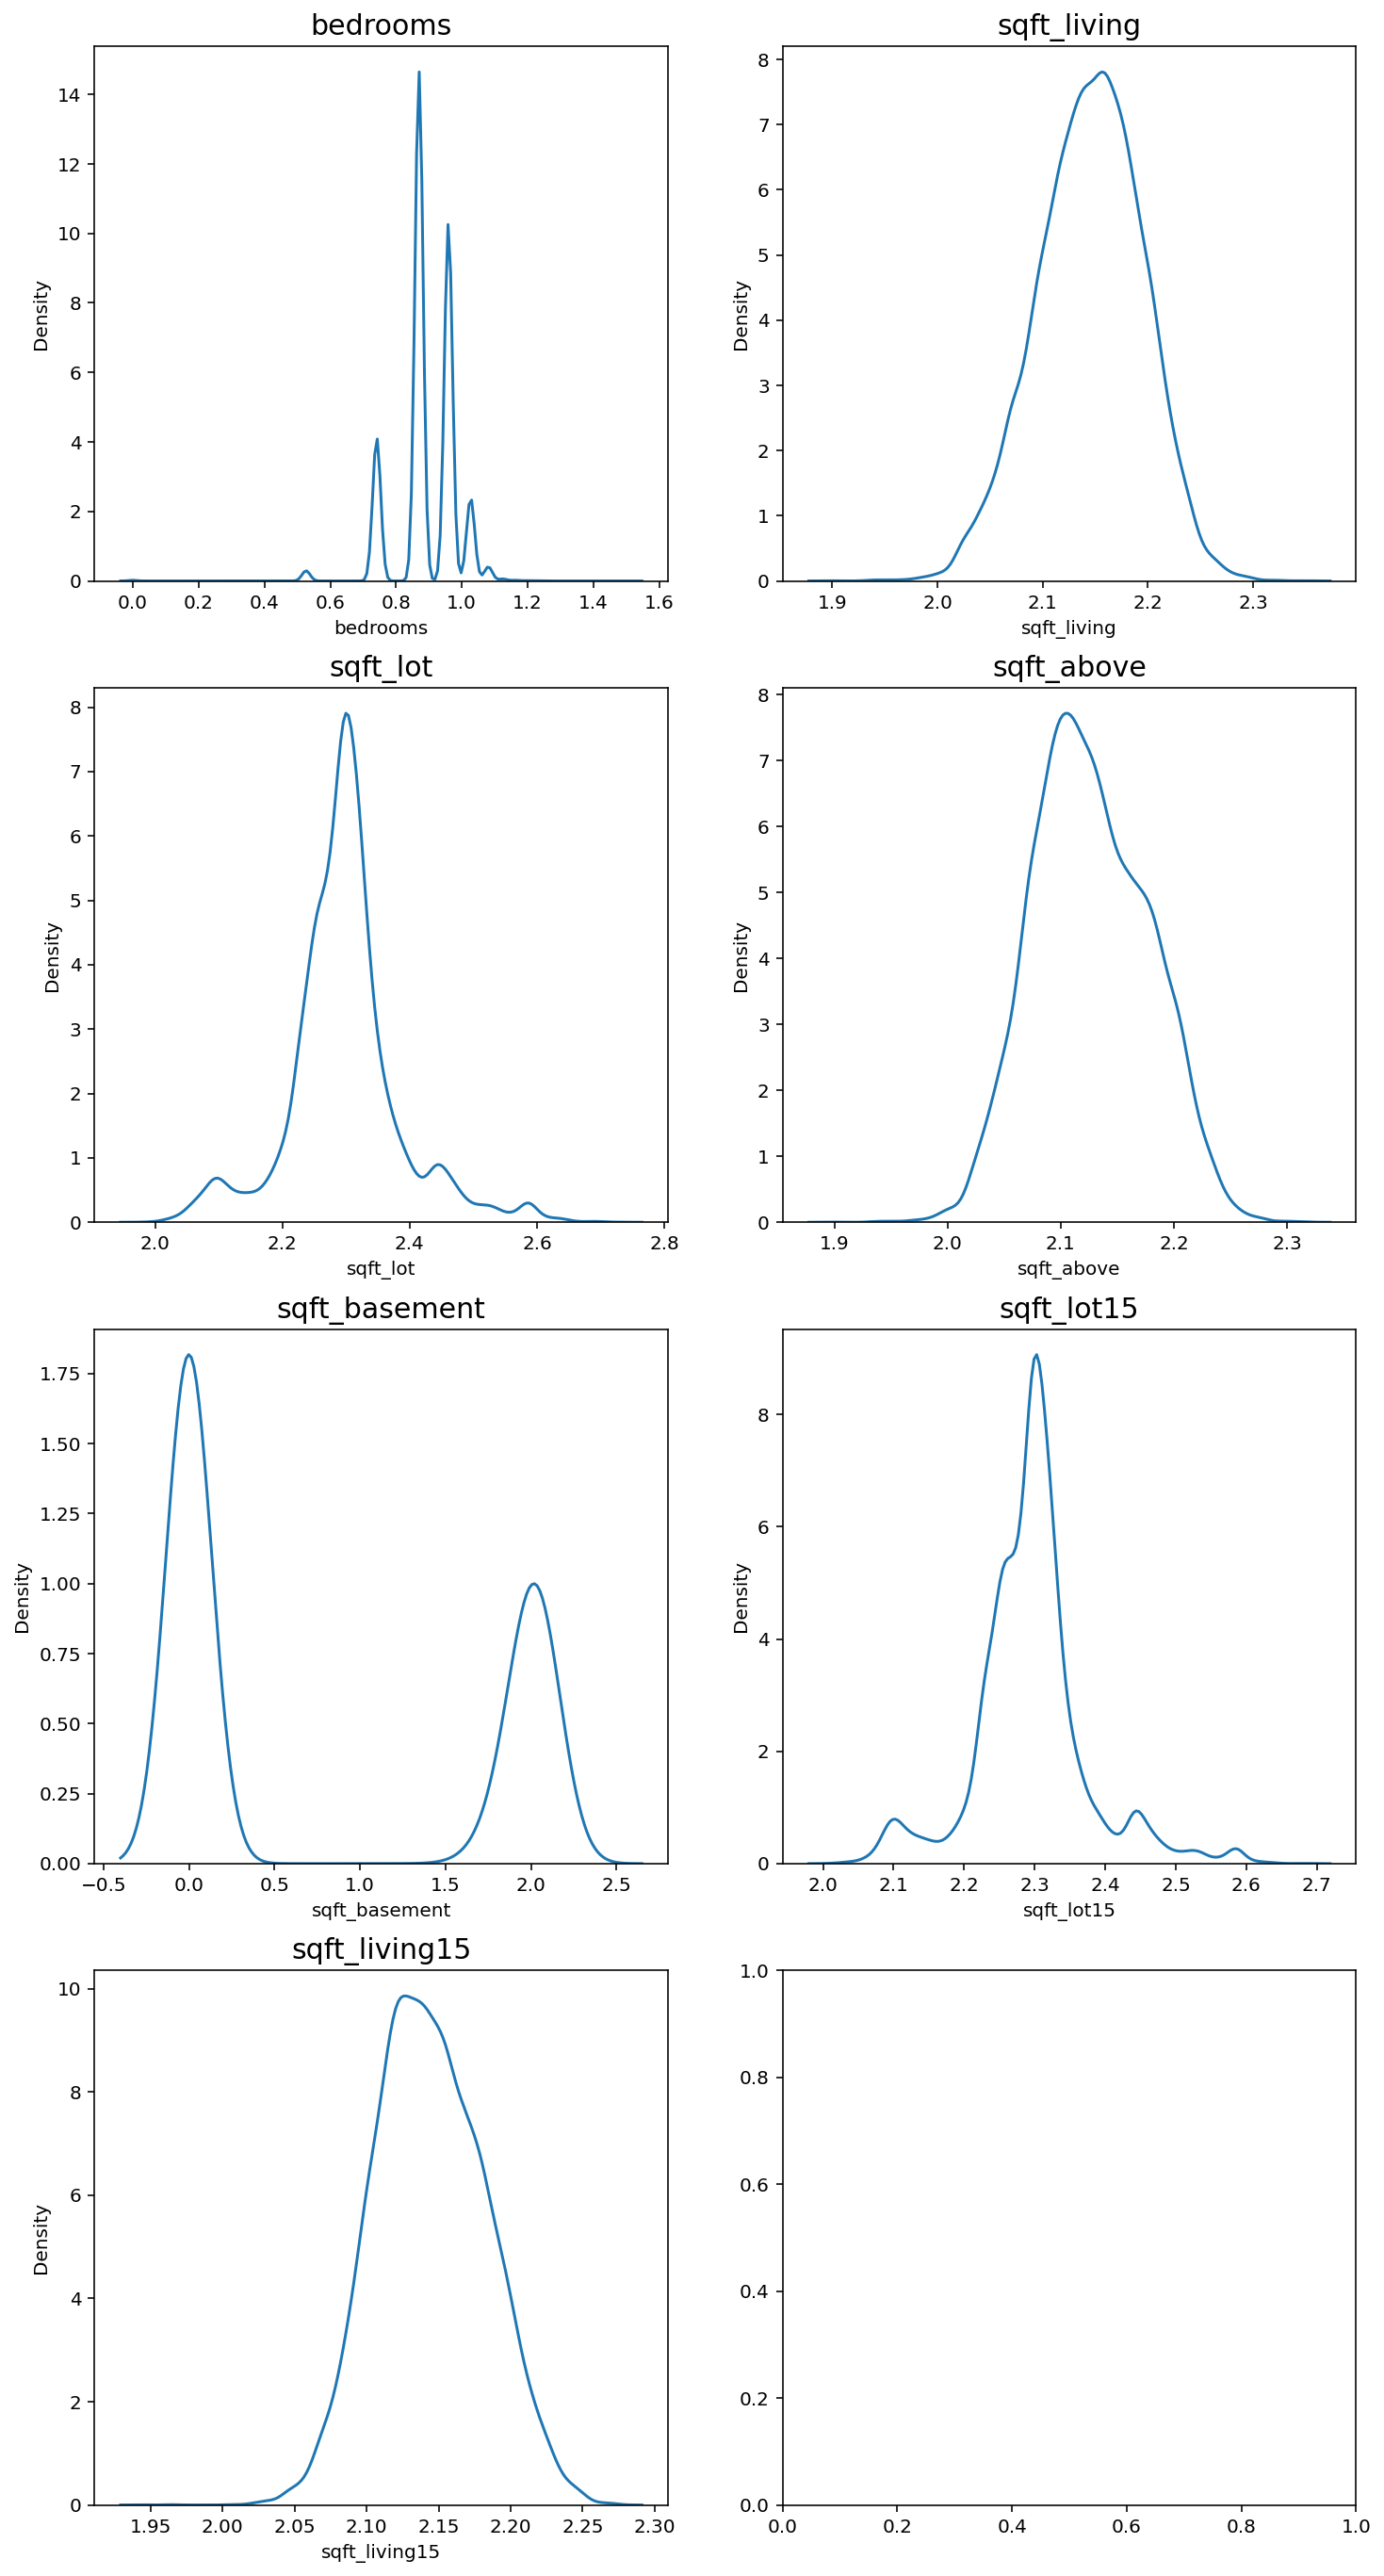

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

그래프를 통해서 한 쪽으로 치우친 분포가 고른 분포로 변환됐는지 확인한다.

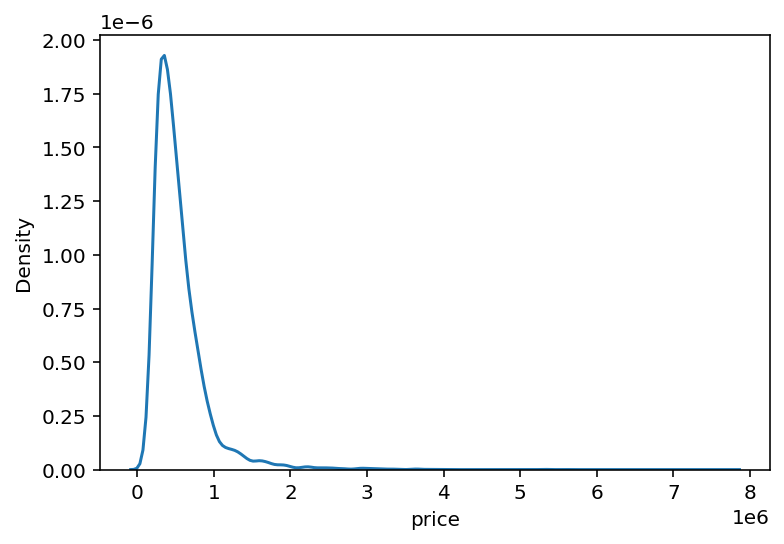

In [ ]:
sns.kdeplot(y)
plt.show()

타겟(정답지)인 집의 가격 price의 분포를 로그 변환했을 때 결과를 유추해본다.
<br/>로그변환 이전의 price의 분포이다.

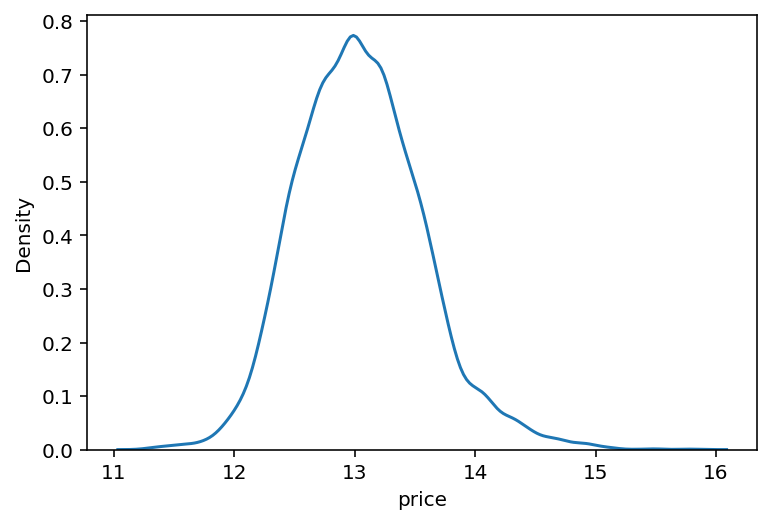

In [ ]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

로그변환 이후의 pric의 분포이다.

#Keras Neural Network

##train, test 데이터 분리

In [ ]:
debug = False
eda_view = True

num_rows = 2000 if debug else None
train = pd.read_csv(train_data_path, nrows = num_rows)
test = pd.read_csv(sub_data_path, nrows = num_rows)

## 데이터 전처리

In [ ]:
x_train = train.drop(['price', 'id'], axis=1)
x_test = test.drop(['id'], axis=1)
y_train = train['price']
y_train = y_train.values.reshape(-1,1)

id를 제외한 모든 feature를 모델 훈련시 사용한다.
<br/>타겟(정답지)으로 price 컬럼을 사용한다.

In [ ]:
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)
y_train = y_scaler.transform(y_train)

표준화 작업을 진행한다.
<br/>데이터의 피처를 각각의 평균이 0이고 분산이 1인
<br/>가우시안 정규 분포를 가진 값으로 변환한다.

##모델 구성

In [ ]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

r2 공분산 함수를 정의한다.

In [ ]:
np.random.seed(2022)

seed값을 설정한다.

In [ ]:
def make_model1():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='elu',	input_dim=x_train.shape[1]))
    model.add(layers.Dense(8, activation='elu'))
    model.add(layers.Dense(1))

    optimizer = optimizers.Adam(lr=0.001)
    model.compile(optimizer= optimizer, loss = 'mse', metrics=['mae', coeff_determination])
    return model

하이퍼 파라미터 최적화 알고리즘으로 Adam을 사용한다.

[Adam]
<br/>모멘텀과 AdaGrad를 결합한다.
<br/>매개변수 공간을 효율적으로 탐색해주며
<br/>하이퍼파라미터의 '편향 보정'이 진행된다는 점이 Adam의 특징이다.

In [ ]:
def make_model2():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='elu',	input_dim=x_train.shape[1]))
    model.add(layers.Dense(8, activation='elu'))
    model.add(layers.Dense(1))

    optimizer = optimizers.RMSprop(lr=0.001)
    model.compile(optimizer= optimizer, loss = 'mse', metrics=['mae', coeff_determination])
    return model

하이퍼 파라미터 최적화 알고리즘으로 RMSprop을 사용한다.

[RMSProp]
<br/>AdaGrad는 과거의 기울기를 제곱하여 더하는 방식으로 학습을 진행하므로 점점 갱신 정도가 약해진다.
<br/>무한히 학습한다면 갱신량이 0이 되어 전혀 갱신되지 않는 일이 발생하게 된다.
<br/>이를 개선한 것이 RMSProp이다. 
<br/>가중치의 기울기 제곱들을 취합해서 갱신하는 대신 지수적 평균(exponential averaging)
을 사용한다.


In [ ]:
epoch = 200
patient = 20
k = 4
num_val_samples = len(x_train) // k

4 폴드(k) 검정에 2개 모델, 각 훈련 별 patient는 20
<br/>실제 돌려 보면 대략 각 폴드 마다 100 epoch 정도에서 학습이 종료된다.

In [ ]:
model_path = '/content/drive/MyDrive/LMS/KingCountyHouse/'
if not os.path.exists(model_path):
    os.mkdir(model_path)

model_path1 = model_path + 'best_model1.hdf5'
model_path2 = model_path + 'best_model2.hdf5'

모델 학습 결과를 저장할 디렉터리와 파일명을 설정한다.

In [ ]:
callbacks1 = [
    EarlyStopping(monitor='val_loss', patience=patient, mode='min', verbose=1),
    ModelCheckpoint(filepath=model_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
    ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = patient / 3, min_lr=0.000001, verbose=1, mode='min')
    ]

In [ ]:
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience=patient, mode='min', verbose=1),
    ModelCheckpoint(filepath=model_path2, monitor='val_loss', verbose=1, save_best_only=True, mode='max'),
    ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = patient / 3, min_lr=0.000001, verbose=1, mode='min')
    ]

Keras의 Callbacks 함수 EarlyaStopping은 검증 세트에서의 손실이 더 이상 감소하지 않으면 학습을 중단한다.
<br/>ModelCheckpoint은 모델을 학습시키는 동안 에포크마다 자동으로 저장한다.

ReduceLROnPlateau은 검증 손실이 향상되지 않을 때 학습률을 조절한다.
<br/>TensorBoard는 지표 요약 도표, 훈련 그래프 시각화, 활성화 히스토그램, 샘플링 된 프로파일링을 제공한다.

## 모델 학습

In [ ]:
for i in range(k):
    print('Fold num #', i+1)
    val_data = x_train[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]

    partial_train_data = np.concatenate(
        [x_train[:i*num_val_samples],
        x_train[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [y_train[:i*num_val_samples],
        y_train[(i+1) * num_val_samples:]],
        axis=0
    )
    
    model1 = make_model1()
    model2 = make_model2()
    

    history1 = model1.fit(
        partial_train_data, 
	    partial_train_targets,
        validation_data=(val_data, val_targets), 
	    epochs=epoch, 
	    batch_size=16, 
	    callbacks=callbacks1)
    
    history2 = model2.fit(
        partial_train_data, 
	    partial_train_targets,
        validation_data=(val_data, val_targets), 
	    epochs=epoch, 
	    batch_size=16, 
	    callbacks=callbacks2)

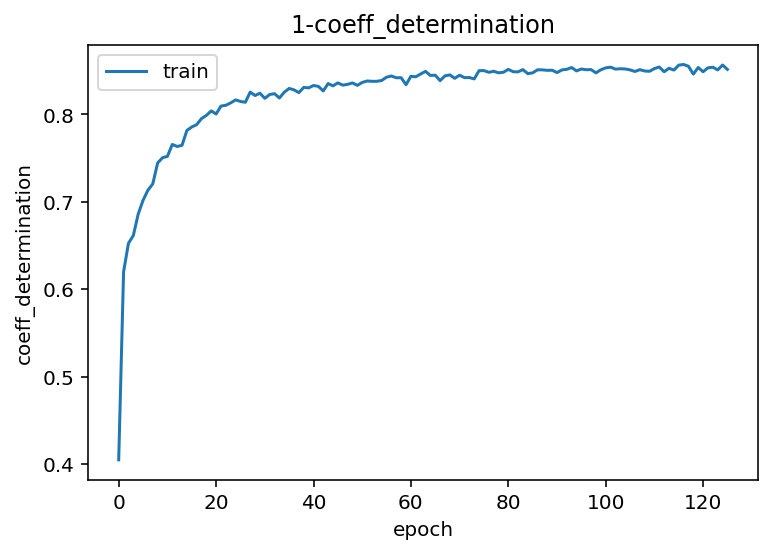

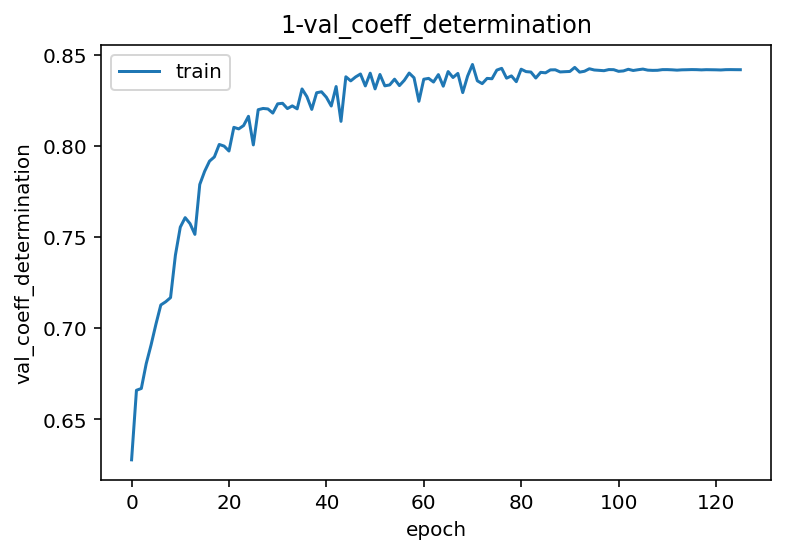

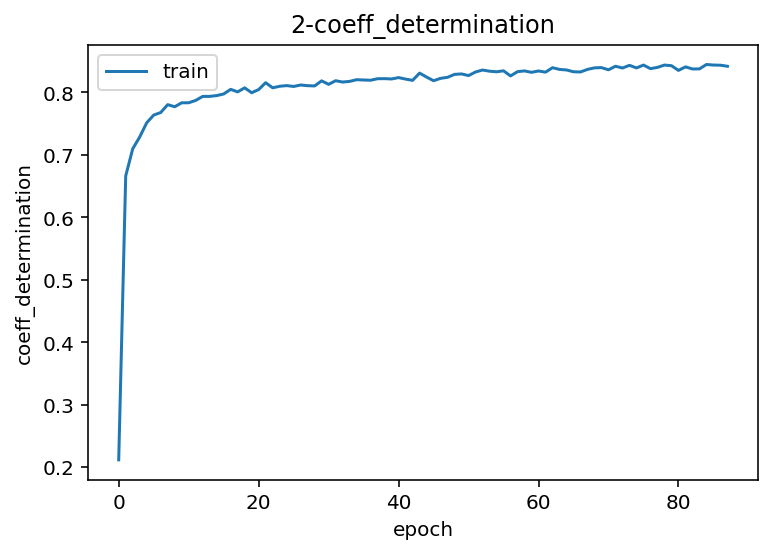

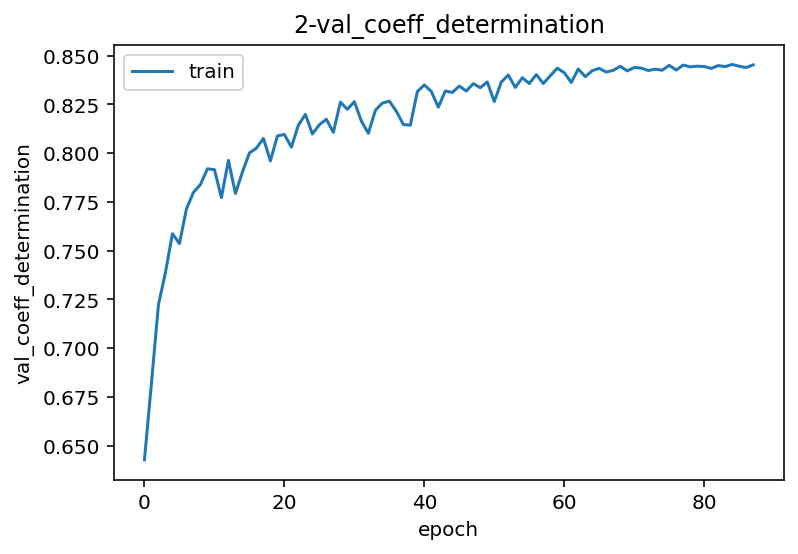

In [ ]:
plt.plot(history1.history['coeff_determination'])
plt.title('1-coeff_determination')
plt.ylabel('coeff_determination')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['val_coeff_determination'])
plt.title('1-val_coeff_determination')
plt.ylabel('val_coeff_determination')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['coeff_determination'])
plt.title('2-coeff_determination')
plt.ylabel('coeff_determination')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['val_coeff_determination'])
plt.title('2-val_coeff_determination')
plt.ylabel('val_coeff_determination')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
best_model1 = make_model1()
best_model1.load_weights(model_path1)
best_model1.fit(
   	x_train, 
	y_train, 
	epochs=epoch, 
	batch_size=16, 
	shuffle=True, 
	validation_split=0.2,
    callbacks=callbacks1
    )

best_model2 = make_model2()
best_model2.load_weights(model_path2)
best_model2.fit(
   	x_train, 
	y_train, 
	epochs=epoch, 
	batch_size=16, 
	shuffle=True, 
	validation_split=0.2,
    callbacks=callbacks2
    )

In [ ]:
y_preds_best1 = best_model1.predict(x_test)
inv_y_preds_best1 =  np.expm1(y_scaler.inverse_transform(y_preds_best1))

y_preds_best2 = best_model2.predict(x_test)
inv_y_preds_best2 =  np.expm1(y_scaler.inverse_transform(y_preds_best2))

avg_pred = ( inv_y_preds_best1 + inv_y_preds_best2) / 2
avg_pred = avg_pred.astype(int)

In [ ]:
if debug == False:
    sub = pd.read_csv('/content/drive/MyDrive/LMS/KingCountyHouse/sample_submission.csv')
    sub['price'] = avg_pred
    sub.to_csv('./neural_avg.csv', index=False)

#결론

밑바닥부터 시작하는 딥러닝 1, 2, 3권을 읽고 나서야
<br/>Keras의 Neural Network를 이해할 수 있을 것으로 보인다.
<br/>그 때 이 코드를 리뷰하는 것을 완성한다.
<br/>지금은 코드 리뷰를 미완성하는 것으로 남겨둔다.

#참고문헌

[사이킷런으로 시작하는 머신러닝 - 데이터 전처리(피처 스케일링)](https://jaaamj.tistory.com/20)
<br/>[딥러닝 프레임워크 종류별 장. 단점 - 텐서플로, 케라스, 파이토치](https://hongong.hanbit.co.kr/%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%94%84%EB%A0%88%EC%9E%84%EC%9B%8C%ED%81%AC-%EB%B9%84%EA%B5%90-%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C-%EC%BC%80%EB%9D%BC%EC%8A%A4-%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98/)
<br/>[케라스 콜백 함수](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=baek2sm&logNo=222013688414)
<br/>[7.2 케라스 콜백과 텐서보드를 사용한 딥러닝 모델 검사와 모니터링](https://codebaragi23.github.io/books/DeepLearningFromKeras/Part2/Chapter7/7.2/)
<br/>[왜도와 첨도에 관해 알아보아요](https://m.blog.naver.com/moses3650/220880815585)
<br/>[갈아먹는 딥러닝 기초 Activation Function(활성화 함수) 종류](https://yeomko.tistory.com/39)
<br/>[RMSProp](https://wikidocs.net/152835)
